## Simulating Magnetic Control of HOPG Microparticles in Aqueous Solution
**Date: 10/09/20**

**Author: Jaime Sabal**

### Introduction

Graphite is a very cheap material with many potential applications due to its useful electrical, magnetic, thermal and optical properties. For micrometer sized particles in a static aqueous solution, the generation of particle motion requires that large, dominant viscous drag forces are overcome. The preferred method of generating motion is through a magnetic field gradient acting on the particle. Since HOPG microparticles are diamagentic, they are attracted to magnetic field minima and can thus be made to follow minimum-field paths at a distance from the field source [1]. The microparticles that are being magnetically transported can thus be interpreted as being subject to a magnetic potential that can be expressed as follows (Eq. 3 in [1]):

$$ \mathsf{U}_m = -\frac{V{\mid B \mid}^{2}}{2\mu_0} \left[(\chi_{2,\parallel}-\chi_1) +(\chi_{2,\perp}-\chi_{2,\parallel})\cos^2\theta \right] \tag{1}$$

where $V$ is the microparticle volume, $\mid B \mid = B_0 - \nabla Bx$ is the field amplitude with $B_0 = 1.5 \mathsf{T}$ being the magnetic-field strength maximum at $x=0$ and $\nabla B$ being the field gradient in the x-direction (only axis in which there is a gradient in this example). Note that in this case we need a negative field gradient since HOPG is a diamagnetic particle and is attracted toward field minima. Moreover, $\mu_0$ is the permeability of free space, $\chi_1=-9.0*10^{-6}$ is the isotropic magnetic susceptibility of the fluid (water), and $\chi_{2,\parallel} = -8.2*10^{-5}$ and $\chi_{2,\perp} = -5.82*10^{-4}$ are the in-plane and out-of-plane components of the anisotropic magnetic susceptibility of the HOPG particle, and $\theta$ is the particle orientation with respect to the field. However, it is energetically favorable to orient the particle graphene planes parallel to the magnetic-field lines ($\theta = \pm 90^\circ$), allowing us to simplify Eq.1 to just: 

$$ \mathsf{U}_m = -\frac{V{\mid B \mid}^{2}}{2\mu_0} \left[\chi_{2,\parallel}-\chi_1 \right] \tag{2} $$

In the case of this simulation, we will use an ellipse with dimensions $5\mu m \mathsf{x} 5\mu m \mathsf{x} 1\mu m $ with a corresponding volume $\mathsf{V} = 2\pi abc$. In the two cells below we import the necessary python modules and define all the necessary constants. 

### Importing Necessary Modules

In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Defining Necessary Constants

In [25]:
mu_0 = 4*np.pi*1e-01 #permeability of free space in µm*kg*s^(-2)*A^(-2)
V = 2*np.pi*(5)*(5)*(1) #volume of HOPG microparticle in µm^3
chi_water = -9e-06 #magnetic susceptibility of water
chi_parr = -8.2e-05 #in-plane magnetic susceptibility of HOPG
chi_perp = -5.82e-04 #out-of-plane magnetic susceptibility of HOPG
dc = 10 #y-axis position of centre wire in µm
I_centre = 5 #current of centre wire in amperes
m = 2.26*1e-15*V #mass of HOPG microparticle in kg
g = 9.80665*1e07 #acceleration due to gravity (µm/s^2)

#brownian motion constants
kb = 1.38064852e-23 #Boltzmann constant (m^2*kg*s^(-2)*K^(-1))
T = 298 #absolute temperature (Kelvin, eq. to 25 deg Celsius)
a = 5 #microparticle radius (µm)
eta = 8.9e-04 #fluid viscosity (Pa*s)
gamma = 6*np.pi*eta*a #particle friction coefficient (Pa*s*µm)
D = (kb*T)/gamma #constant used in brownian motion calculation

### Using a Centre Wire to Guide our HOPG Particle

Now that we have imported the needed functions and defined the constants that will be used throughout the notebook, we can proceed to derive the equation of motion of our desired system. We can start by simulating the motion of the particle using a 2D wire guide, where the particle moves along an axis and is trapped along the other axes. This can be achieved through the combination of the magnetic field generated from a current flowing through an infinitely thin centre wire (along the x-axis) and a uniform bias field perpendicular to the wire (y-axis). This combination allows for there to be a line above and parallel to the wire where both fields cancel out and that serves as a guide for the particle. 

In this notebook, we will use a centre wire with a current $I_{c} = 3 \mathsf{A}$ that is $\mathsf{dc} = 10µm$ below the desired "height" (on z-axis) of the particle motion. The equation to calculate the field strength at a distance $r$ from the wire is [2]: 

$$ B_{wire} = \frac{\mu_0 I_c}{2\pi r} \tag{3} $$

In the cell below we create an array of values for the field created by the centre wire. 

In [27]:
#x, y, and z arrays
x_array = np.linspace(-50, 50, 500)
z_array = np.linspace(-50, 50, 500)

#calculate field components for x and z values
Bx = [(mu_0*I_centre/((2*np.pi)*(x**2+(z+dc)**2)))*(z+dc) for x,z in zip(x_array, z_array)]
By = 0
Bz = [(mu_0*I_centre/((2*np.pi)*(x**2+(z+dc)**2)))*(-x) for x,z in zip(x_array, z_array)]

#insert components into a single list
B_wire = [Bx, By, Bz]

### Adding the Bias Field

Now that we have an array of values for each component of the field created by the centre wire, we can move on to adding a bias field perpendicular to the wire, in the x-direction. First, however, we must calculate the necessary magnitude of the bias field in order to cancel out with the centre wire field at a distance $\mathsf{dc} = 10\mu m$ from the wire. This can be done through the following equation: 

$$ B_{bias} = \frac{\mu_0 I_{centre}}{2\pi(10\mu m)} \tag{4} $$

And the expression for the total field is thus: 

$$ B_{total} = B_{wire} - B_{bias} \tag{5} $$

And we can then calculate the magnitude of the total field $B_0$ through Pythagoras' theorem: 

$$ \mid B \mid = \sqrt{B_{tot,x}^2+B_{tot,y}^2+B_{tot,z}^2} \tag{6} $$

/Users/jaimesabal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


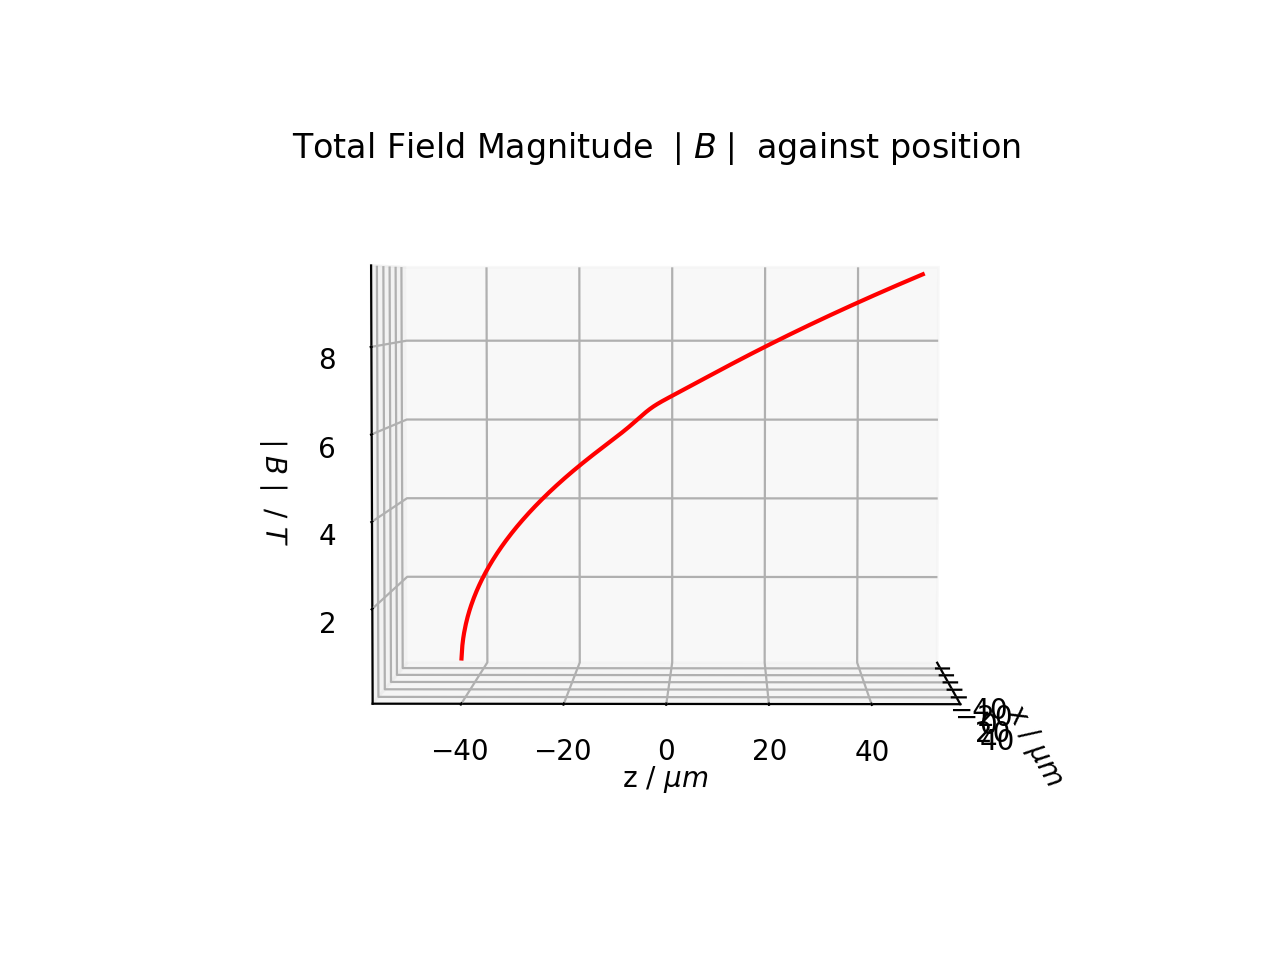

In [29]:
#Bias field in all directions
Bias_x = (mu_0*I_centre)/(2*np.pi*dc)
Bias_y = 0
Bias_z = 0

#Total Bias field
B_bias = [Bias_x, Bias_y, Bias_z]

#Extra field components
B_extra_x = [(mu_0*I_centre*(x+45)**(0.5))/(2*np.pi) for x in x_array]
B_extra_y = 0
B_extra_z = 0

#Extra field
B_extra = [B_extra_x, B_extra_y, B_extra_z]

#initiate total field list
B_tot = []

#loop to calculate components of total field
for i in range(3):
    B_tot.append(np.array(B_wire[i])-B_bias[i]+B_extra[i])

#total field magnitude
B_mod = [np.sqrt(B_tot[0][i]**2+B_tot[1]**2+B_tot[2][i]**2) for i in range(len(x_array))]

#plot total field magnitude against x and z
plt.figure()
ax = plt.axes(projection="3d")
ax.plot(x_array,z_array,B_mod, "r")
ax.set_title("Total Field Magnitude $\mid B \mid$ against position")
ax.set_xlabel("x / $\mu m$")
ax.set_ylabel("z / $\mu m$")
ax.set_zlabel(r"$\mid B \mid $ / $T$")
plt.show()

As can be seen above, the magnitude of the total field is a minimum at around $-43\mu m$ and increases with distance. From these values, we can actually plot a contour of the potential our particle is subject to in 2 spatial dimensions by taking the modulus squared of our field and calculating the potential using Eq. 2. 

In the code cell below we plot a contour of this potential.

/Users/jaimesabal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


<IPython.core.display.Javascript object>


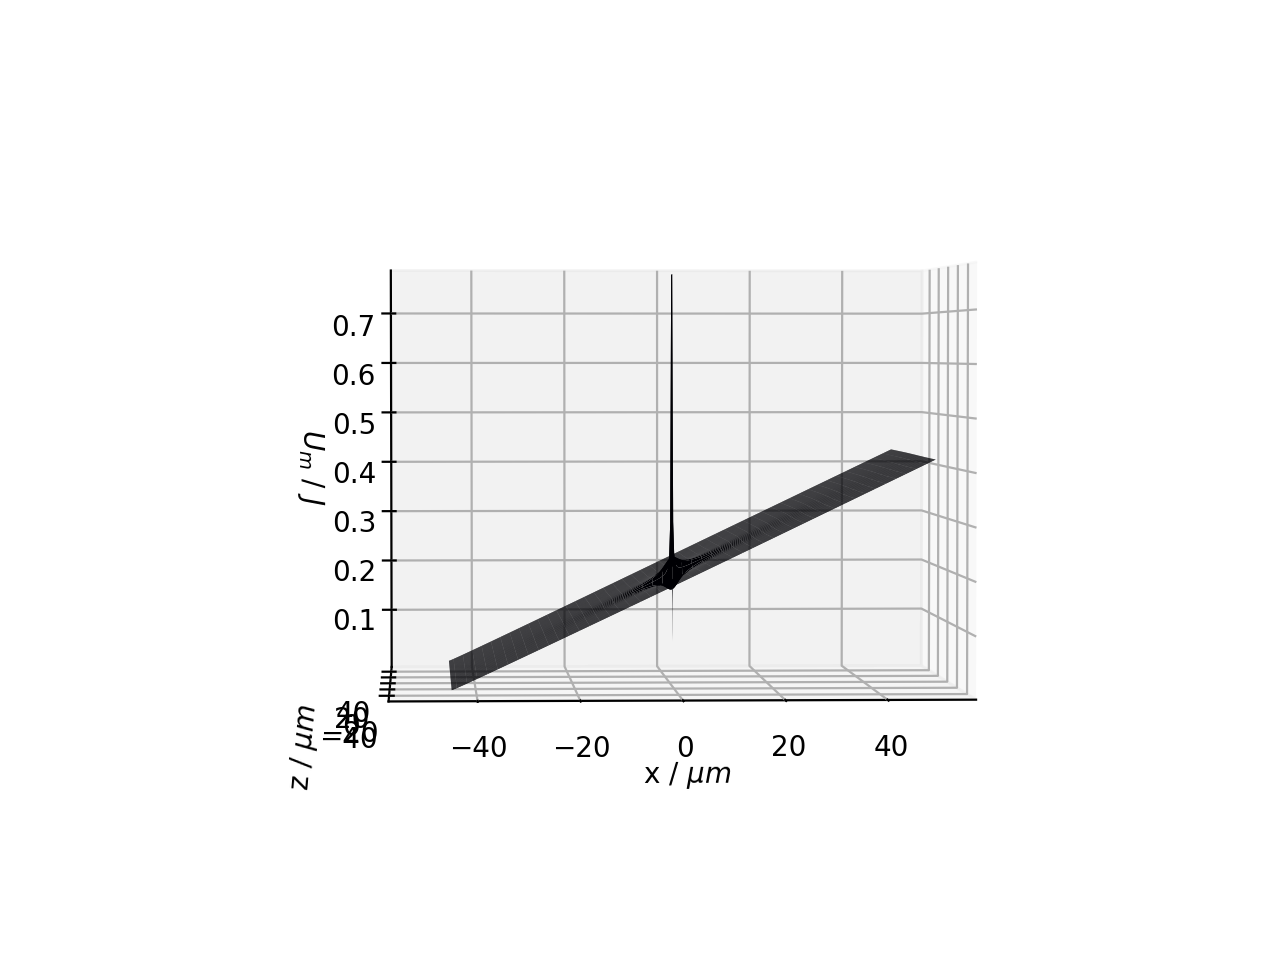

/Users/jaimesabal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [30]:
#create a mesh grid for our contour
x_mesh, z_mesh = np.meshgrid(x_array,z_array)

#calculate field components for x and z values
Bx = [(mu_0*I_centre/((2*np.pi)*(x**2+(z+dc)**2)))*(z+dc) for x,z in zip(x_mesh, z_mesh)]
By = 0
Bz = [(mu_0*I_centre/((2*np.pi)*(x**2+(z+dc)**2)))*(-x) for x,z in zip(x_mesh, z_mesh)]

#insert components into a single list
B_wire = [Bx, By, Bz]

#Extra field mesh components
B_extra_x_mesh = [(mu_0*I_centre*(x+45)**(0.5))/(2*np.pi) for x in x_mesh]
B_extra_y_mesh = 0
B_extra_z_mesh = 0

#Extra field
B_extra_mesh = [B_extra_x_mesh, B_extra_y_mesh, B_extra_z_mesh]

#initiate total field list
B_tot = []

#loop to calculate components of total field
for i in range(3):
    B_tot.append(np.array(B_wire[i])-B_bias[i]+B_extra_mesh[i])

#total field magnitude
B_mod = [np.sqrt(B_tot[0][i]**2+B_tot[1]**2+B_tot[2][i]**2) for i in range(len(x_mesh))]

#modulus squared of field
B_mod_squared = np.square(B_mod)

#mesh of values for potential due to field
U_m = -(V*B_mod_squared)*(chi_parr-chi_water)/(2*mu_0)   

#plot contour of potential
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(x_mesh,z_mesh,U_m, cmap="inferno")
ax.set_xlabel("x / $\mu m$")
ax.set_ylabel("z / $\mu m$")
ax.set_zlabel("$U_m$ / $J$");

### Meeting Note: 
The potential above appears to be correct in the sense that it decreases with distance along the x-axis. However, I am not sure if this potential is actually representative of the motion our microparticle would have in a magnetic field gradient since there is also variation along the z-axis. In order to bypass this change in field along the z-axis, we will simply ignore any effect the field would have along it. 

Moreover, during our last meeting we mentioned that the extra component to the field that needed to be added should be along the y-direction. Is this actually the case?? Shouldn't we instead need it to be along the x-direction such that the particle moves within the "tube" it is confined in? 

### Discussion continues...
However, we are only interested in the particle movement in the x-axis and at a value $z_{trap} = 0 $ (height at which the magnitude of the total field evaluated at x=0 equals the bias field ).

In the cell below we calculate the magnitude of the total field for $z=0$. 

<IPython.core.display.Javascript object>


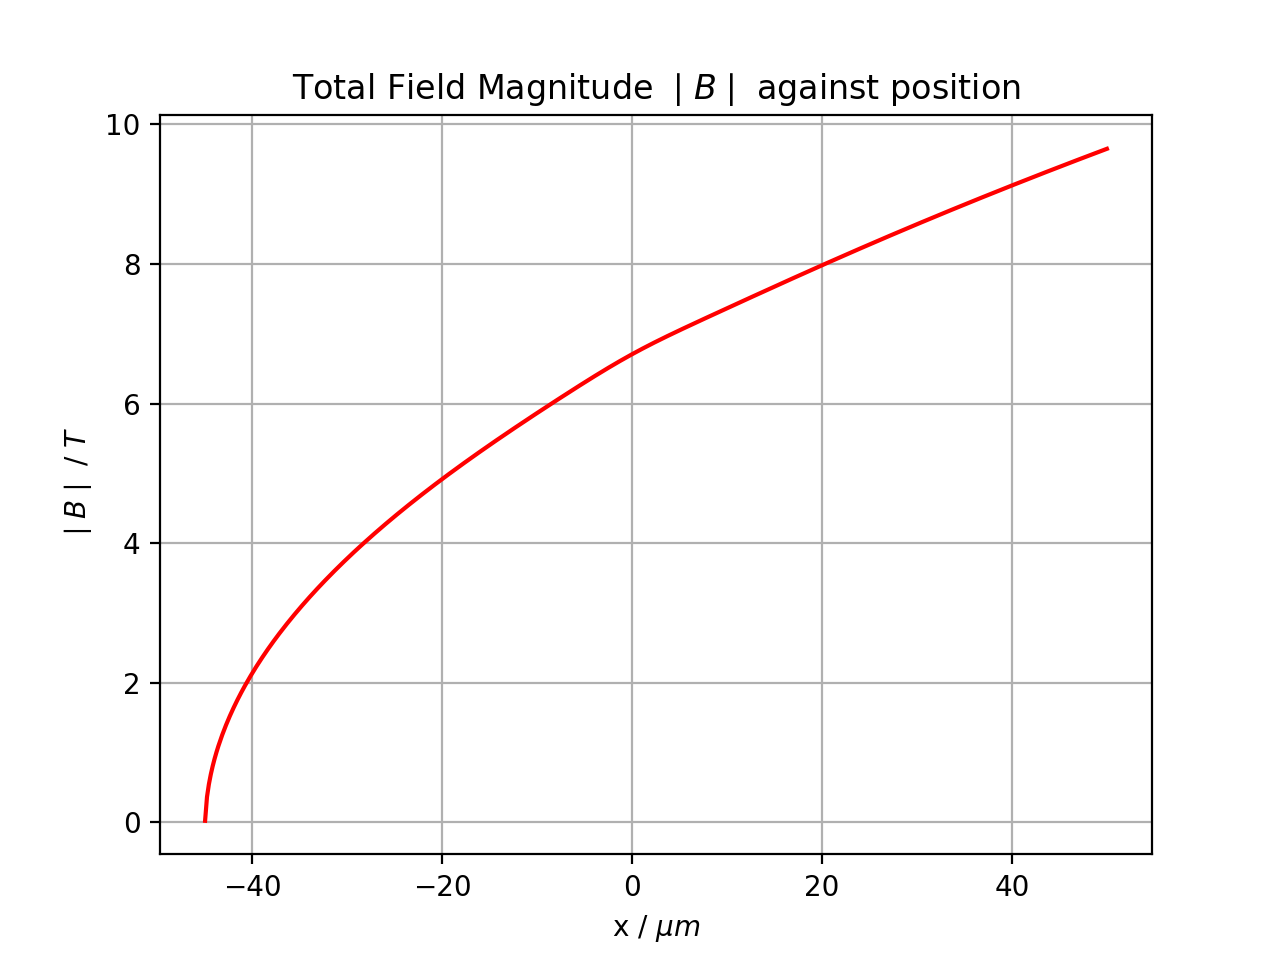

In [31]:
#calculate field components for x values
Bx_trap = [(mu_0*I_centre/((2*np.pi)*(x**2+(dc)**2)))*(dc) for x in x_array]
By_trap = 0
Bz_trap = [(mu_0*I_centre/((2*np.pi)*(x**2+(dc)**2)))*(-x) for x in x_array]

#centre wire field and total field
B_wire_trap = [Bx_trap,By_trap,Bz_trap]
B_tot_trap = [] #initiate total field list

#loop to calculate components of total field
for i in range(3):
    B_tot_trap.append(np.array(B_wire_trap[i])-B_bias[i]+B_extra[i])
    
#total field magnitude/modulus
B_mod_trap = [np.sqrt(B_tot_trap[0][i]**2+B_tot_trap[1]**2+B_tot_trap[2][i]**2) for i in range(len(x_array))]

#plot total field magnitude against x
plt.figure()
plt.grid()
plt.plot(x_array, B_mod_trap, "r") #multiply by a factor of 1e06 to have in units µm
plt.title("Total Field Magnitude $\mid B \mid$ against position")
plt.xlabel("x / $\mu m$")
plt.ylabel(r"$\mid B \mid$ / $T$");

Having calculated the values of $\mid B \mid$ for different x values, we can now at last make use of Eq. 2 to derive the equation of motion of our particle moving under the influence of this magnetic field. 

### Deriving the Equation of Motion

We can express the potential that the particle is subject to due to the magnetic field as: 

$$ \mathsf{U}_m = -\frac{V{\mid B \mid}^{2}}{2\mu_0} \left[\chi_{2,\parallel}-\chi_1 \right] \tag{9} $$

where ${\mid B \mid}^2 = \mathsf{a}_0 + \mathsf{a}_1 x + \mathsf{a}_2 x^2 + \mathsf{a}_3 x^3  $. 

### Meeting Note: 
I looked up the `scipy` spline fit as mentioned in the previous meeting to see if it could be used in this case but, as I understand it, this type of fit is used to interpolate a curve at new points, which I don't believe is necessary in this case?  

### Continue... 
In the code cell below we will plot the square of ${\mid B \mid}$ and calculate the values of the constants $\mathsf{a}_0$, $\mathsf{a}_1$, $\mathsf{a}_2$, and $\mathsf{a}_3$ using NumPy's `polyfit` function. 

<IPython.core.display.Javascript object>


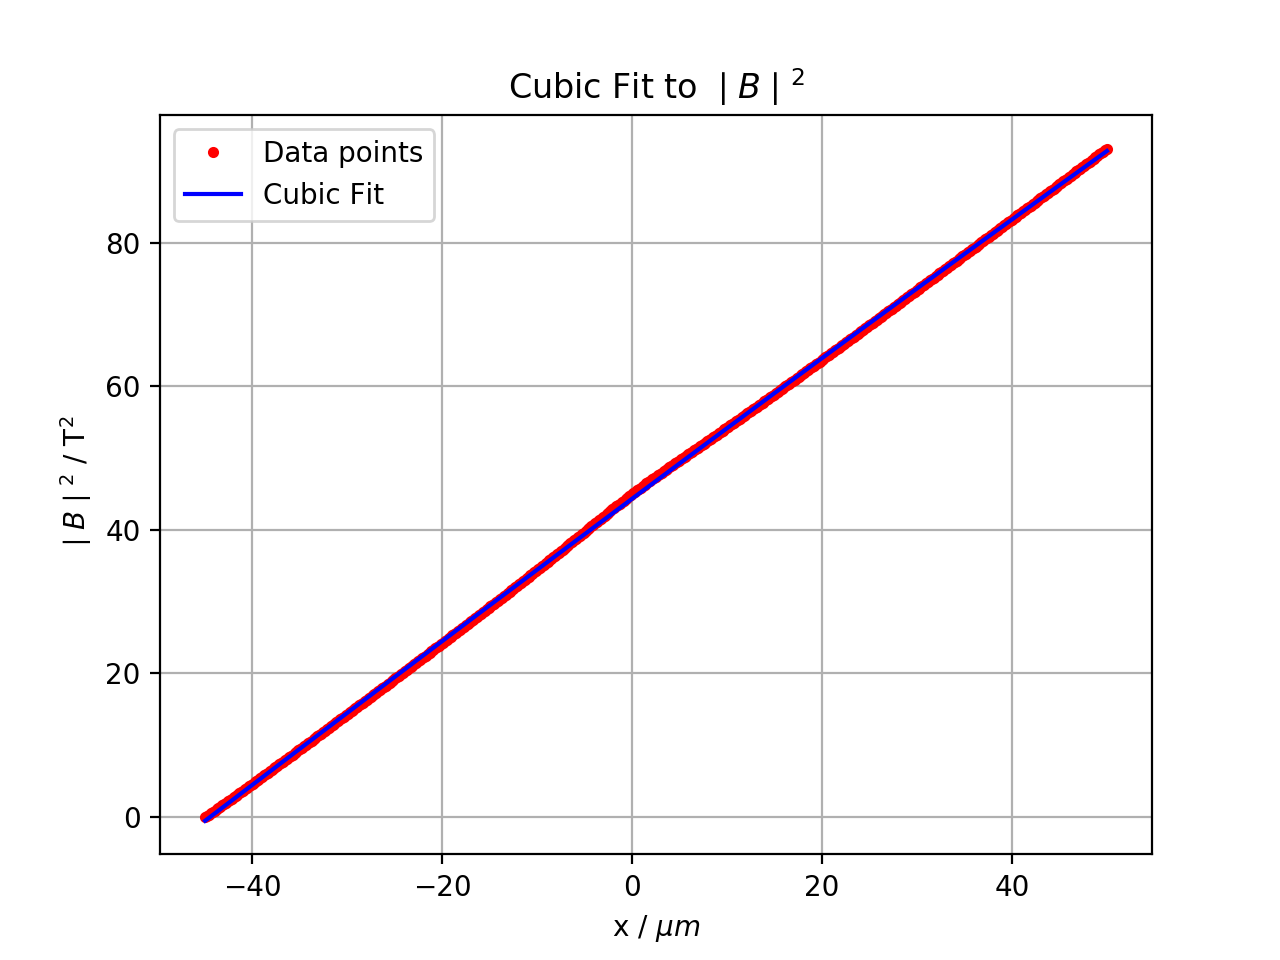

The coefficients to the cubic equation for ${\mid B \mid}^2$ are:
a3 =  -8.77350751926821e-07 T/µm^3
a2 =  -0.0003000187159752517 T/µm^2
a1 =  0.9867178879078139 T/µm
a0 =  44.3535440535989 T


In [32]:
#calculate B_mod squared
B_mod_squared_trap = np.square(B_mod_trap)

#get parameters for cubic fit to data
idx = np.isfinite(x_array) & np.isfinite(B_mod_trap)
cubic_params = np.polyfit(x_array[idx],B_mod_squared_trap[idx],deg=3)
cubic_fit = (cubic_params[0]*x_array**3 + cubic_params[1]*x_array**2 
            + cubic_params[2]*x_array + cubic_params[3])

a0, a1, a2, a3 = cubic_params[3], cubic_params[2], cubic_params[1], cubic_params[0]

cubic_fit_nonan = [] #initiate list

for i in range(len(B_mod_squared_trap)):
    if np.isnan(B_mod_squared_trap[i]) == True:
        cubic_fit_nonan.append(np.nan)
    else:    
        cubic_fit_nonan.append(cubic_fit[i])

#plot 
plt.figure()
plt.grid()
plt.plot(x_array, B_mod_squared_trap, "r.", label="Data points")
plt.plot(x_array, cubic_fit_nonan, "b", label="Cubic Fit")
plt.title("Cubic Fit to ${\mid B \mid}^2$")
plt.xlabel("x / $\mu m$")
plt.ylabel(r"${\mid B \mid}^2$ / $\mathsf{T}^2$")
plt.legend();

print("The coefficients to the cubic equation for ${\mid B \mid}^2$ are:")
print("a3 = ", a3, "T/µm^3")
print("a2 = ", a2, "T/µm^2")
print("a1 = ", a1, "T/µm")
print("a0 = ", a0, "T")

We can therefore now proceed to deriving the equation of motion of our particle by using the Euler-Lagrange equation: 

$$ \frac{\delta \mathsf{L}}{\delta x}-\frac{d}{d t}\frac{\delta \mathsf{L}}{\delta \dot{x}} = 0 \tag{10} $$

where $\mathsf{L} = \mathsf{T - U_m}$ is the Lagrangian and $\mathsf{T} = \frac{1}{2}m \dot{x}^2$ is the kinetic energy of the particle using the convention that $ \dot{x} = \frac{dx}{dt} $. Including the non-conservative forces that are the viscous drag forces and the Brownian term we get the result that: 

$$ m \ddot{x} =  \frac{V(\chi_{2,\parallel}-\chi_1)}{2\mu_0}(\mathsf{a}_1 + $$

$$2\mathsf{a}_2 x + 3\mathsf{a}_3 x^2) - \gamma\dot{x} + \sqrt{2D}W(t)  \tag{11} $$

which, ignoring the inertial terms yields the following finite difference equation: 

$$ x_{i+1} = x_{i} + (\mathsf{a}_1 + 2\mathsf{a}_2 x_{i} + 3\mathsf{a}_3 x_{i}^2)\left[\frac{V{\Delta t}(\chi_{2,\parallel}-\chi_1)}{2\gamma\mu_0}\right] $$
$$+ \sqrt{2D\Delta t}w_i \tag{12} $$

where $\Delta t$ is the discrete time step between consecutive particle movements. Moreover, in the case of this simulation we have a boundary value problem with initial condition: 

$$ x(t=0) = 0 $$

In the code cell below we define a function that iteratively solves for the motion of our microparticle using the finite difference equation above: 

In [35]:
def HOPG_guide(t_initial, t_final, dt, initial_condition = [0,0,0.05], gravity=True): 
    """Simulates the motion of an HOPG microparticle submerged in an aqueous solution
    under the influence of a magnetic field gradient. 
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (float/int): discrete time step.
    initial_condition (1D-array): values for initial condition (default=(0)).
    gravity (bool): adds gravity term to equation of motion if true.
    
    Output: 
    x_motion (1D-NumPy array): array of particle position values in x-axis. 
    y_motion (1D-NumPy array): array of particle position values in y-axis. 
    z_motion (1D-NumPy array): array of particle position values in z-axis. 
    """
    N = int((t_final-t_initial)/dt) #number of discrete time steps.
    
    #w_x, w_y, and w_z arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    rand_norm_yarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    rand_norm_zarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    
    #initialise motion array
    x_motion = [initial_condition[0]] 
    y_motion = [initial_condition[1]] 
    z_motion = [initial_condition[2]] 
    
    #coniditional statement in case gravity term is desired
    if gravity == True: 
        for i in range(N-1): 
            x_motion.append(x_motion[i]+(a1+2*a2*x_motion[i]+3*a3*x_motion[i]**2)*(dt*V*(chi_parr-chi_water))/(2*gamma*mu_0) + rand_norm_xarray[i])
            y_motion.append(y_motion[i] + rand_norm_yarray[i])
            z_motion.append(z_motion[i] - m*g + rand_norm_zarray[i]) 
            
            #dont let particle lower than surface
            if z_motion[i+1] < 0: 
                z_motion[i+1] = 0
    
    #case where gravity doesnt act on particle due to it being on surface
    else: 
        z_motion[0] = 0
        for i in range(N-1): 
            x_motion.append(x_motion[i]+(a1+2*a2*x_motion[i]+3*a3*x_motion[i]**2)*(dt*V*(chi_parr-chi_water))/(2*gamma*mu_0) + rand_norm_xarray[i])
            y_motion.append(y_motion[i] + rand_norm_yarray[i])    
            z_motion.append(z_motion[i] + rand_norm_zarray[i])
            
            if z_motion[i+1] < 0: 
                z_motion[i+1] = 0
           
    return x_motion, y_motion, z_motion

<IPython.core.display.Javascript object>


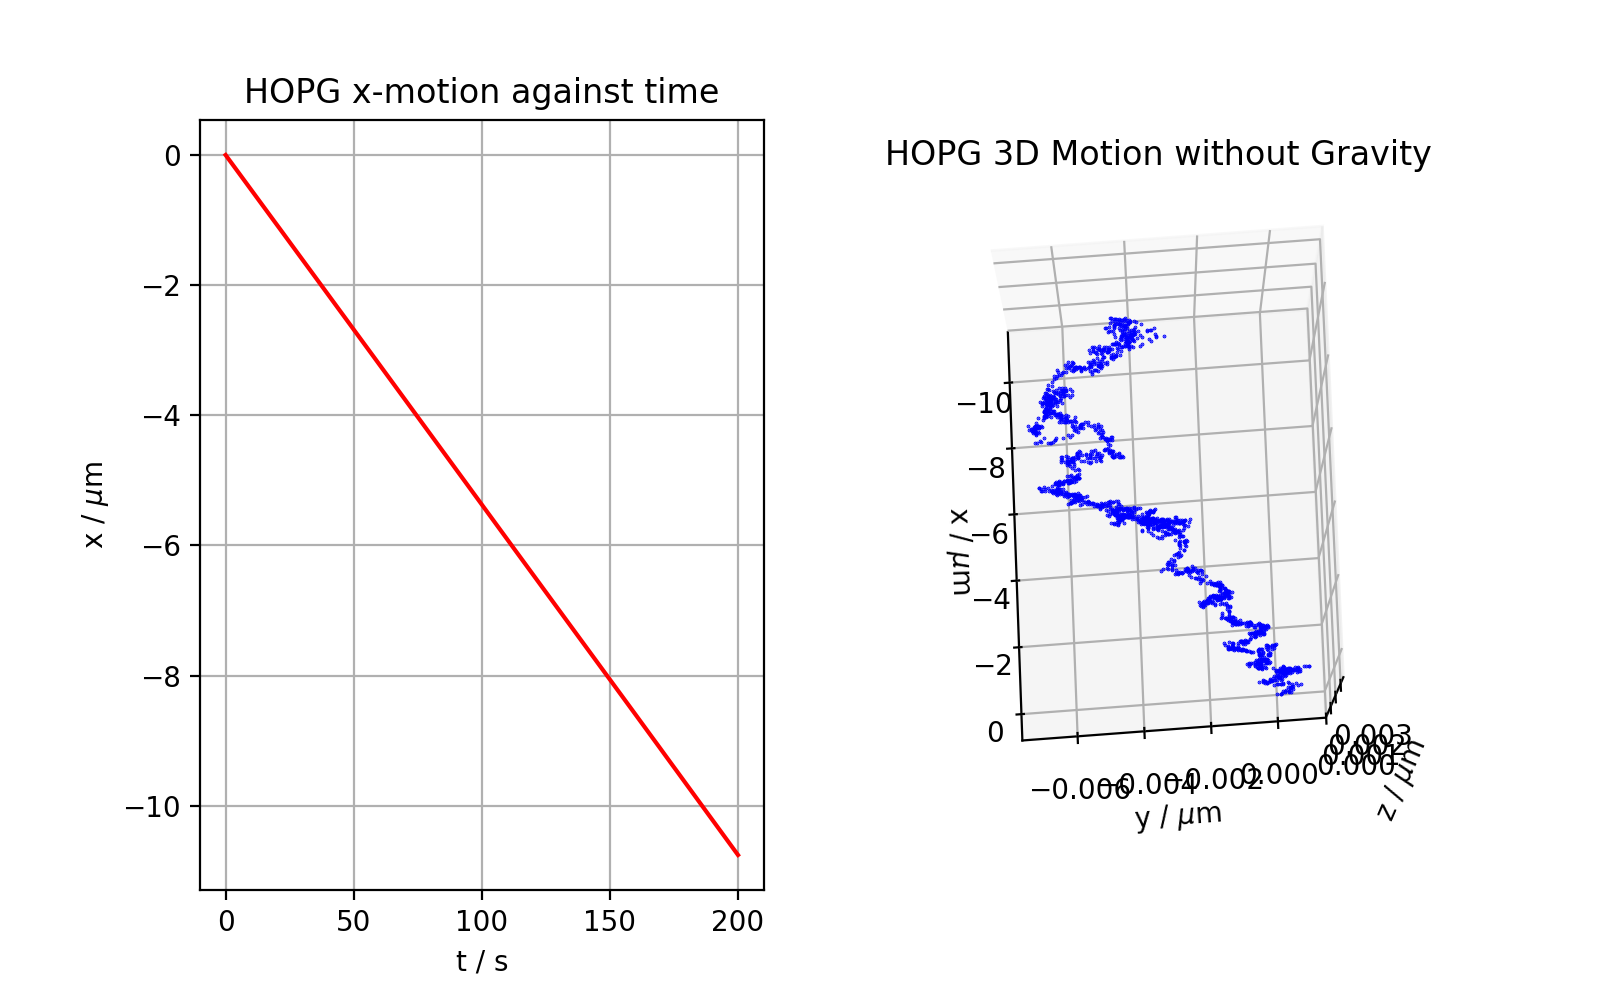

In [37]:
dt = 0.1 #discrete time step in seconds
t_initial = 0 #sec
t_final = 200 #sec

#time array
time_array = np.linspace(t_initial,t_final,int((t_final-t_initial)/dt))

#motion x-array
x_motion, y_motion, z_motion = HOPG_guide(t_initial, t_final, dt, gravity=False)

#plot particle motion 
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
ax1.grid()
ax1.plot(time_array, x_motion, "r")
ax1.set_title("HOPG x-motion against time")
ax1.set_xlabel("t / s")
ax1.set_ylabel("x / $\mu$m");

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot(x_motion, y_motion, z_motion, "b.", markersize=0.7)
ax2.set_title("HOPG 3D Motion without Gravity")
ax2.set_xlabel("x / $\mu$m")
ax2.set_ylabel("y / $\mu$m")
ax2.set_zlabel("z / $\mu$m");

### Adding Gravity Term 

We can also simulate gravitational acceleration by simply adding the term $mgz$ to our potential. In the cell below we show the ffects this has on our particles motion. 

<IPython.core.display.Javascript object>


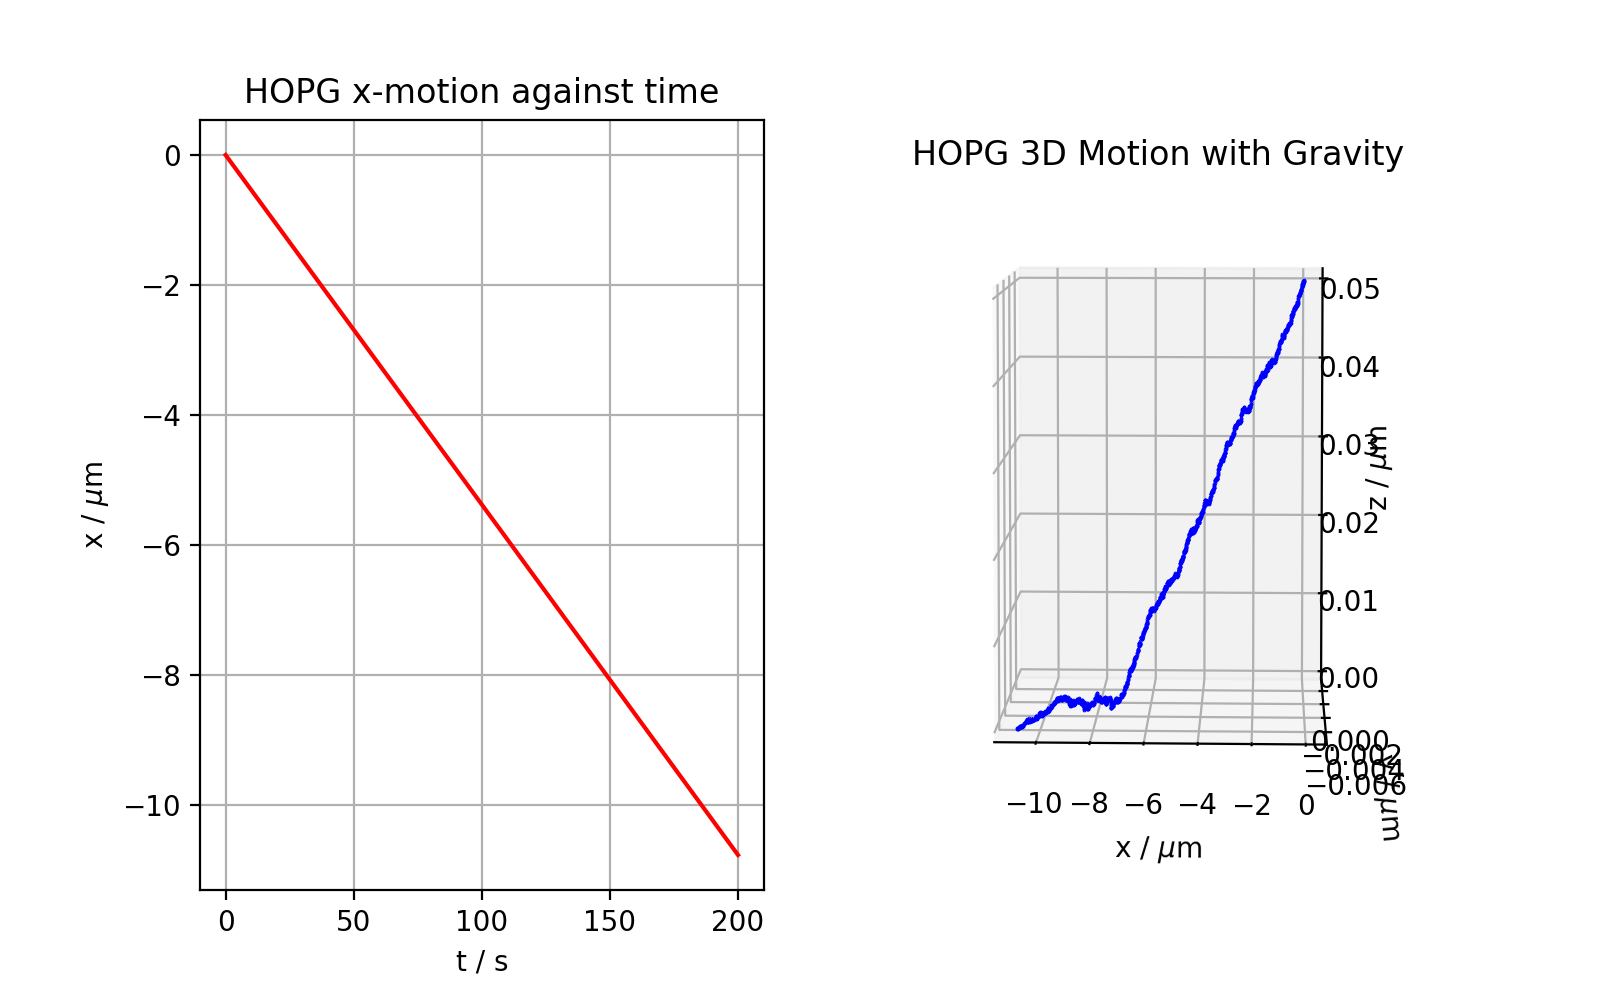

In [38]:
#motion x-array
x_motion, y_motion, z_motion = HOPG_guide(t_initial, t_final, dt, gravity=True)

#plot particle motion 
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
ax1.grid()
ax1.plot(time_array, x_motion, "r")
ax1.set_title("HOPG x-motion against time")
ax1.set_xlabel("t / s")
ax1.set_ylabel("x / $\mu$m");

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot(x_motion, y_motion, z_motion, "b.", markersize=0.7)
ax2.set_title("HOPG 3D Motion with Gravity")
ax2.set_xlabel("x / $\mu$m")
ax2.set_ylabel("y / $\mu$m")
ax2.set_zlabel("z / $\mu$m");

### Meeting Note: 
As can be seen, the particle appears to move in the +x-direction, as expected by the potential it is subject to. However, there are a few things that intrigue me; for starters, I had to manually find a value for the current flowing through the centre wire in order to get a field gradient that made sense in the context of this siumlation (I needed the factors from both the potential and the Brownian motion in the particles' equation of motion to be more or less of the same magnitude so that you can clearly see the effect of both terms on its motion). Moreover, i can indeed be seen how the particle moves in the direction of minimum potential and minimum field. The reason for this is that since we are dealing with a diamagnetic particle, it moves towards field minima. 

Furthermore, I am not sure wether including a brownian term for the particles motion along the y and z axes is accurate necessarily. I do believe these must be included but, given the parameters used it seems that they dominate over the graviational term (in the case of motion along the z-axis). This probably occurs due to the dimensions chosen for our microparticle; a smaller particle will experience a lower graviational force (weight) and (more?) Brownian fluctuations. 

## Magnetophoretic Orientation of HOPG Microparticles:

The next step in our analysis would be to explore the effects the magnetic field has on how the HOPG microparticle orients itself within an optical trap when it is combined with an electric field . We will use the equations of motion derived in [3] in order to simulate this phenomenon effectively. As is explained in [3], "In our scheme, we first apply a vertical magnetic field in order to align the HOPG micro-flakes parallel to the field direction. Once aligned, the micro-flakes are still free to rotate around the magnetic field direction. We then apply an AC electric field perpendicular to the magnetic field to rotate the micro-flakes and constrain their orientation to the plane containing both the magnetic and electric fields". As the magnetic field is applied, the particle experiences a torque $\bf{T^{m} = m_{eff}\times B_0} $, of which the only non-zero torque components are $T^{m}_x$ and $T^{m}_z$, so that it will rotate around an in-plane axis until it reaches rotational equilibrium. The net magnetic torque around this axis is given by: 

$$ T^m_{\parallel} = \frac{V_2 B^2_0}{2\mu_0} \left[ \chi_\perp - \chi_\parallel \right]\sin(2\theta) \tag{13}$$

where $\chi_\perp$ and  $\chi_\parallel$ are the perpendicular and parallel components of the magnetic susceptibility of our microparticle and $\chi_\perp - \chi_\parallel \neq 0$. 

As an electric field is applied, the graphene planes will experience a torque analogous to the first $\bf{T^{e} = p_{eff}\times E_0} $ until stable rotational equilibrium takes place for orientation angles $\phi = \pm 90^{o}$. Once alligned, the particle will be rotationally trapped as long as the elctric field is on. For small-angle deviations from orientational equilibrium, the rotational trap can be considered approximately harmonic, i.e $T_{\parallel}^{e}(\phi) = -T_{max}^{e}\sin(2\phi) \approx - k_e \phi$, where $k_e = 2T_{max}^{e}$ is the rotational trap stiffness. The equation of motion for the electro-orientation of the micro-particles in solution is given by the balance of torques:

$$ I_{\parallel}\ddot{\phi} = -C_{\parallel}\dot{\phi} + T_{\parallel}^{e} + \sqrt{2k_BTC_{\parallel}}W(t) \tag{14} $$

where $I_{\parallel}$ is the moment of inertia of the micro-flake around its in-plane axis, $C_{\parallel} = $ is the corresponding rotational friction coefficient and $T_{\parallel}^{e}$ is the applied electric torque ($T_{\parallel}^{e} =  T_{max}^{e}\sin(2\phi)$, where $T_{max}^{e} = 0.6\times 10^{-12}N\mu m$). The last term in Eq. 14 corresponds to the stochastic rotational Brownian fluctuations at temperature $T$, where $k_B$ is Boltzmann's constant and $W(t)$ is a random variable with Gaussian distribution of zero mean and unity variance. However, the inertial term $I_{\parallel}$ can be neglected in comparison to the viscous drag term $-C_{\parallel}\dot{\phi}$. From this, we can easily derive the finite difference equation: 

$$ \phi_{i+1} = \phi_{i}-\Delta t \left[ \frac{T_{max}^{e}}{C_{\parallel}}\sin(2\phi_{i}) - \sqrt{\frac{2k_BT}{C_{\parallel}}w_i} \right] \tag{15} $$

In the following code cells we define the necessary constant and functions needed to simulate the allignment of the microflakes as the fields are applied. 

### Defining Necessary Constants

In [39]:
max_torque_low = 3*1e-19 #maximum torque (low) in Nm
max_torque_med = 1.5*1e-18 #maximum torque (medium) in Nm
max_torque_high = 7.5*1e-18 #maximum torque (high) in Nm
rot_frict_coeff = 9e-21 #rotational friction coefficient

### Defining Function for Microflake Allignment

In [41]:
def HOPG_orientation(t_initial, t_final, dt, initial_condition = [85], max_torque = max_torque_med): 
    """Simulates orientational allignment of HOPG microflakes due to the applying
    of an electric field. 
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (float/int): discrete time step.
    initial_condition (1D-array): values for initial condition (default=(90 degrees)).
    
    Output: 
    phi_array (1D-NumPy array): array of particle orientation angles in degrees. 
    """
    N = int((t_final-t_initial)/dt) #number of discrete time steps.
    
    #randomly distributed array of values w_i
    rand_norm_phiarray = np.random.normal(0,40,N)
    
    #initialise array of values for phi
    phi_array = [initial_condition[0]]
    
    #iterate to calculate allignment of HOPG 
    for i in range(N-1):
        phi_array.append(phi_array[i]-dt*((max_torque/rot_frict_coeff)*np.sin(np.deg2rad(2*phi_array[i]))-np.sqrt((2*kb*T)/rot_frict_coeff)*rand_norm_phiarray[i]))
    
    return phi_array, rand_norm_phiarray

<IPython.core.display.Javascript object>


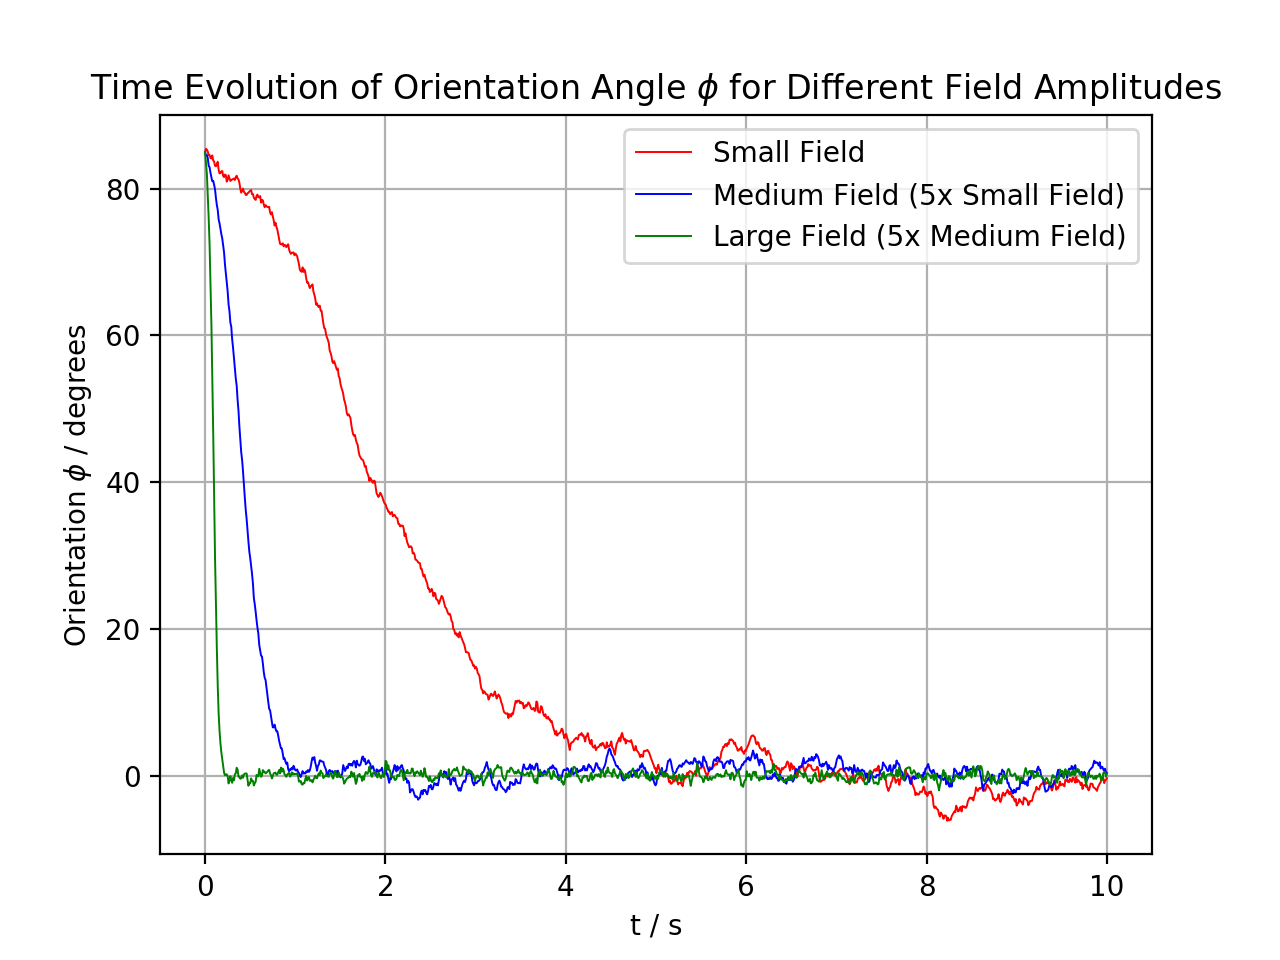

In [42]:
dt = 0.01 #discrete time step in seconds
t_initial = 0 #seconds
t_final = 10 #seconds

#time array
time_array = np.linspace(t_initial,t_final,int((t_final-t_initial)/dt))

#get array of values for phi in specified time frame for different maximum torques
phi_array1 = HOPG_orientation(t_initial, t_final, dt, max_torque = max_torque_low)[0]
phi_array2 = HOPG_orientation(t_initial, t_final, dt, max_torque = max_torque_med)[0]
phi_array3 = HOPG_orientation(t_initial, t_final, dt, max_torque = max_torque_high)[0]

#plot figure with data
plt.figure()
plt.grid()
plt.plot(time_array, phi_array1, "r", linewidth=0.7, label="Small Field")
plt.plot(time_array, phi_array2, "b", linewidth=0.7, label="Medium Field (5x Small Field)")
plt.plot(time_array, phi_array3, "g", linewidth=0.7, label="Large Field (5x Medium Field)")
plt.title("Time Evolution of Orientation Angle $\phi$ for Different Field Amplitudes")
plt.xlabel("t / s")
plt.ylabel("Orientation $\phi$ / degrees")
plt.legend();

### Bibliography

[1]. J. Nguyen, D. V. Conca, J. Stein, L. Bovo, C. A. Howard, and I. L. Garcia, “Magnetic control of graphitic microparticles in aqueous solutions,” Proceedings of the National Academy of Sciences, vol. 116, no. 7, pp. 2425–2434, 2019.

[2]. I. L. Garcia, “Advances in the design and operation of atom chips,” dissertation, 2008.

[3]. J. Nguyen, S. Contera and I. Llorente García, "Magneto-electrical orientation of lipid-coated graphitic micro-particles in solution", RSC Advances, vol. 6, no. 52, pp. 46643-46653, 2016. Available: 10.1039/c6ra07657b [Accessed 30 September 2020].